In [139]:
#The data has been Loaded, Read and Explored using the following libraries.
from google.colab import drive
import numpy as np
import pandas as pd

In [140]:
drive.mount('/content/drive')
orig_data = pd.read_csv('/content/drive/My Drive/liver dataset.csv')
data = orig_data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
#understaing the data set
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [142]:
#understanding the data set
print("data set length:", len(data))
print("Data Set shape:", data.shape)

data set length: 418
Data Set shape: (418, 20)


In [143]:
print(data.info())  # Summary of the dataset including column data types and missing values
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [144]:
data = data.drop(['ID'], axis=1)
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [145]:
data.describe().T
# It helps in understanding the structure of the dataset, identifying missing values, and gaining insights into the distribution of numerical features.

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


In [146]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number'])

info = pd.DataFrame()
info['IsNull'] = data.isnull().sum()
info['Duplicate'] = data.duplicated().sum()
info['Unique'] = data.nunique()

info['Min'] = numeric_columns.min()
info['Max'] = numeric_columns.max()


print(info)


               IsNull  Duplicate  Unique      Min       Max
N_Days              0          0     399    41.00   4795.00
Status              0          0       3      NaN       NaN
Drug              106          0       2      NaN       NaN
Age                 0          0     344  9598.00  28650.00
Sex                 0          0       2      NaN       NaN
Ascites           106          0       2      NaN       NaN
Hepatomegaly      106          0       2      NaN       NaN
Spiders           106          0       2      NaN       NaN
Edema               0          0       3      NaN       NaN
Bilirubin           0          0      98     0.30     28.00
Cholesterol       134          0     201   120.00   1775.00
Albumin             0          0     154     1.96      4.64
Copper            108          0     158     4.00    588.00
Alk_Phos          106          0     295   289.00  13862.40
SGOT              106          0     179    26.35    457.25
Tryglicerides     136          0     146

#Preprocessing

In [147]:
data.dropna(subset = ['Drug'] , inplace = True)
#Although Null valued rows account for 25% of the dataset, dropping makes more sense than filling as multiple columns are NULL for those rows

In [148]:
data.fillna(data['Cholesterol'].mean(), inplace = True)
data.fillna(data['Copper'].mean(), inplace = True)
data.fillna(data['Tryglicerides'].mean(), inplace = True)
data.fillna(data['Platelets'].mean(), inplace = True)
#As the remaining NULL values are less frequent, filling with mean makes more sense

In [149]:
numeric_columns = data.select_dtypes(include=['number'])

info = pd.DataFrame()
info['IsNull'] = data.isnull().sum()
info['Duplicate'] = data.duplicated().sum()
info['Unique'] = data.nunique()

info['Min'] = numeric_columns.min()
info['Max'] = numeric_columns.max()


print(info)

               IsNull  Duplicate  Unique      Min       Max
N_Days              0          0     301    41.00   4556.00
Status              0          0       3      NaN       NaN
Drug                0          0       2      NaN       NaN
Age                 0          0     308  9598.00  28650.00
Sex                 0          0       2      NaN       NaN
Ascites             0          0       2      NaN       NaN
Hepatomegaly        0          0       2      NaN       NaN
Spiders             0          0       2      NaN       NaN
Edema               0          0       3      NaN       NaN
Bilirubin           0          0      85     0.30     28.00
Cholesterol         0          0     202   120.00   1775.00
Albumin             0          0     135     1.96      4.64
Copper              0          0     159     4.00    588.00
Alk_Phos            0          0     295   289.00  13862.40
SGOT                0          0     179    26.35    457.25
Tryglicerides       0          0     147

In [150]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label = le.fit_transform(data['Status'])
data.drop("Status", axis=1, inplace=True)
data["Status"] = label
data.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,400,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,2
1,4500,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0
2,1012,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,2
3,1925,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,2
4,1504,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1


In [151]:
non_num_cols = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]
for col in non_num_cols:
  lenc = LabelEncoder()

  label = lenc.fit_transform(data[col])
  data.drop(col, axis=1, inplace=True)
  data[col] = label
data.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,2,0,0,1,1,1,2
1,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,0,0,0,0,1,1,0
2,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,2,0,1,0,0,0,1
3,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,2,0,0,0,1,1,1
4,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,1,0,0,1,1,0


#Data Visualisation

In [152]:
#Data visualization
import matplotlib.pyplot as plt

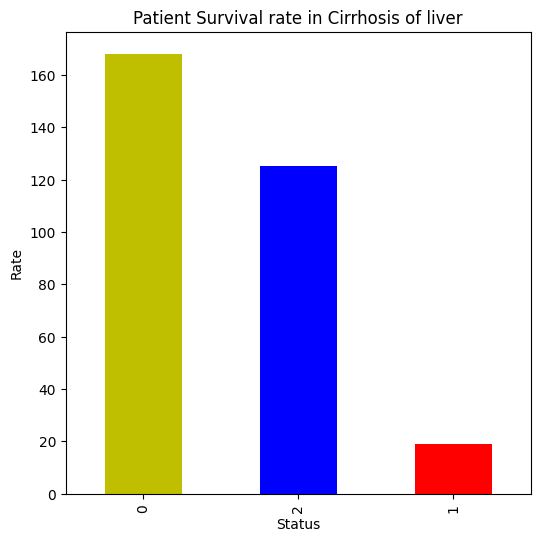

In [153]:
#Bar Chart
x = data['Status'].value_counts()
plt.figure(figsize=(6, 6))
x.plot(kind='bar', color=['y', 'b','r'])
plt.title('Patient Survival rate in Cirrhosis of liver')
plt.xlabel('Status')
plt.ylabel('Rate')
plt.show()

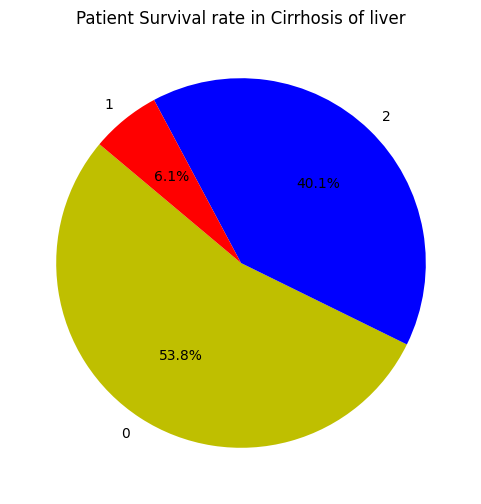

In [154]:
# Pie Chart
x= data['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=140, colors=['y', 'b','r'])
plt.title('Patient Survival rate in Cirrhosis of liver')
plt.show()

#Data preparation

In [155]:
X = data.drop(columns=['Status'])
Y = data['Status']

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#split into train and test sets

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Naive Bayes using all columns

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = gnb.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.3333333333333333


#Random Forest using all columns

In [159]:
from sklearn.ensemble import RandomForestClassifier
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
print()

# Using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.7936507936507936


#Getting the most important columns

In [160]:
importances = clf.feature_importances_
print(importances*100)
print(X.columns.values.tolist())
#'Bilirubin', 'N_Days' and 'Copper' are top 3 features

[12.86383416  7.57075767 14.34679694  5.15932708  7.45977214 10.09543807
  5.93603821  6.49213436  4.58152455  5.60791765  9.96826985  2.70600598
  0.92863685  1.2530487   1.79830991  1.94247504  0.66104635  0.62866647]
['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [161]:
top_10_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Prothrombin']

#Naive Bayes using top 10 columns

In [162]:
X = data[top_10_cols]
Y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [163]:
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = gnb.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7301587301587301


#Random Forest with top 10 columns

In [164]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.7936507936507936


#Dropping NULL columns instead of rows

In [165]:
#from our observations so far we see that the columns which had a lot of NULL values are not very important, dropping the columns instead of the rows may help with accuracy
df = orig_data.copy()
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

info = pd.DataFrame()
info['IsNull'] = df.isnull().sum()
info['Duplicate'] = df.duplicated().sum()
info['Unique'] = df.nunique()

info['Min'] = numeric_columns.min()
info['Max'] = numeric_columns.max()


print(info)

               IsNull  Duplicate  Unique      Min       Max
ID                  0          0     418     1.00    418.00
N_Days              0          0     399    41.00   4795.00
Status              0          0       3      NaN       NaN
Drug              106          0       2      NaN       NaN
Age                 0          0     344  9598.00  28650.00
Sex                 0          0       2      NaN       NaN
Ascites           106          0       2      NaN       NaN
Hepatomegaly      106          0       2      NaN       NaN
Spiders           106          0       2      NaN       NaN
Edema               0          0       3      NaN       NaN
Bilirubin           0          0      98     0.30     28.00
Cholesterol       134          0     201   120.00   1775.00
Albumin             0          0     154     1.96      4.64
Copper            108          0     158     4.00    588.00
Alk_Phos          106          0     295   289.00  13862.40
SGOT              106          0     179

In [166]:
drop_cols = [col for col in df.columns.values.tolist() if df[col].isnull().sum() > 100]
df = df.drop(drop_cols , axis=1)

In [167]:
df.fillna(data['Stage'].median(), inplace = True)
df.fillna(data['Prothrombin'].mean(), inplace = True)
df.fillna(data['Platelets'].mean(), inplace = True)
#As the remaining NULL values are less frequent, filling with mean makes more sense for the float values and median for classifiers

In [168]:
numeric_columns = df.select_dtypes(include=['number'])

info = pd.DataFrame()
info['IsNull'] = df.isnull().sum()
info['Duplicate'] = df.duplicated().sum()
info['Unique'] = df.nunique()

info['Min'] = numeric_columns.min()
info['Max'] = numeric_columns.max()


print(info)

             IsNull  Duplicate  Unique      Min       Max
ID                0          0     418     1.00    418.00
N_Days            0          0     399    41.00   4795.00
Status            0          0       3      NaN       NaN
Age               0          0     344  9598.00  28650.00
Sex               0          0       2      NaN       NaN
Edema             0          0       3      NaN       NaN
Bilirubin         0          0      98     0.30     28.00
Albumin           0          0     154     1.96      4.64
Platelets         0          0     244     3.00    721.00
Prothrombin       0          0      49     3.00     18.00
Stage             0          0       4     1.00      4.00


In [169]:
le = LabelEncoder()

label = le.fit_transform(df['Status'])
df.drop("Status", axis=1, inplace=True)
df["Status"] = label

non_num_cols = ["Sex", "Edema"]
for col in non_num_cols:
  lenc = LabelEncoder()

  label = lenc.fit_transform(df[col])
  df.drop(col, axis=1, inplace=True)
  df[col] = label
df.head()

,ID,N_Days,Age,Bilirubin,Albumin,Platelets,Prothrombin,Stage,Status,Sex,Edema
0,1,400,21464,14.5,2.60,190.0,12.2,4.0,2,0,2
1,2,4500,20617,1.1,4.14,221.0,10.6,3.0,0,0,0
2,3,1012,25594,1.4,3.48,151.0,12.0,4.0,2,1,1
3,4,1925,19994,1.8,2.54,183.0,10.3,4.0,2,0,1
4,5,1504,13918,3.4,3.53,136.0,10.9,3.0,1,0,0


#Data preparation

In [170]:
X = df.drop(columns=['Status'])
Y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Naive Bayes

In [171]:
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = gnb.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.75


#Random Forests

In [172]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset

clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
print()

# Using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.8095238095238095


#Getting the most important columns

In [173]:
importances = clf.feature_importances_
print(importances*100)
print(X.columns.values.tolist())

[15.42062186 26.2840864   9.69360852 17.2237842   9.01016283  7.9151831
  9.28183761  2.58029784  1.0277516   1.56266605]
['ID', 'N_Days', 'Age', 'Bilirubin', 'Albumin', 'Platelets', 'Prothrombin', 'Stage', 'Sex', 'Edema']


In [174]:
top_7_cols = ['ID', 'N_Days', 'Age', 'Bilirubin', 'Albumin', 'Platelets', 'Prothrombin']

In [175]:
X = df[top_7_cols]
Y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Naive Bayes with top 7 columns

In [176]:
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred = gnb.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7142857142857143


#Random Forests with top 7 columns

In [177]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=7)

# Training the model on the training dataset

clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)


from sklearn import metrics
print()

# Using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.7857142857142857


In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Split data into features (X) and target (y)
X = data.drop('Status', axis=1)
y = data['Status']

# Encoding target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Making predictions on test set
y_pred = gnb.predict(X_test)

# Calculating the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Accuracy: 0.651
Precision: 0.562
Recall: 0.552
F1-score: 0.552


In [179]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split data into features (X) and target (y)
X = data.drop('Status', axis=1)
y = data['Status']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training SVM model
svm = SVC(kernel='rbf', gamma='auto')  # You can adjust the kernel and other parameters
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Accuracy: 0.683
Precision: 0.457
Recall: 0.521
F1-score: 0.486


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Split data into features (X) and target (y)
X = data.drop('Status', axis=1)
y = data['Status']


gnb = GaussianNB()

# Performing a 5-fold cross-validation
scores = cross_val_score(gnb, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.66666667 0.6984127  0.72580645 0.69354839 0.67741935]
Mean cross-validation score: 0.6923707117255504


In [181]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into features (X) and target (y)
X = data.drop('Status', axis=1)
y = data['Status']


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

Accuracy: 0.556
Precision: 0.459
Recall: 0.452
F1-score: 0.452
